<a href="https://colab.research.google.com/github/YugantGotmare/Machine-Learning-Projects/blob/master/Uber_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('/content/drive/MyDrive/uber_data.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [4]:
df.shape

(100000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [6]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
df['store_and_fwd_flag'].value_counts()

N    99876
Y      124
Name: store_and_fwd_flag, dtype: int64

In [8]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [9]:
df['store_and_fwd_flag']=df['store_and_fwd_flag'].replace("N","0")

In [10]:
df['store_and_fwd_flag']=df['store_and_fwd_flag'].replace("Y","1")

In [11]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
31769,2,2016-03-10 09:57:45,2016-03-10 10:32:39,5,14.09,-73.870697,40.773670,1,0,-73.990166,40.713787,1,40.5,0.0,0.5,5.00,5.54,0.3,51.84
91980,2,2016-03-01 05:55:32,2016-03-01 06:29:05,1,17.74,-73.778778,40.646667,2,0,-73.967911,40.753922,1,52.0,0.0,0.5,11.67,5.54,0.3,70.01
56621,2,2016-03-10 12:31:37,2016-03-10 12:35:02,1,0.91,-73.958672,40.815769,1,0,-73.962051,40.804569,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80
7011,2,2016-03-10 07:46:21,2016-03-10 07:51:41,1,1.20,-73.953529,40.791019,1,0,-73.961899,40.797962,2,6.5,0.0,0.5,0.00,0.00,0.3,7.30
44430,2,2016-03-10 11:17:35,2016-03-10 11:27:57,1,1.41,-74.009949,40.703541,1,0,-74.015274,40.715931,1,8.5,0.0,0.5,2.32,0.00,0.3,11.62


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [13]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  int64  
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [15]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [16]:
df[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime']
df['pick_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pick_day'] = df['tpep_pickup_datetime'].dt.day
df['pick_month'] = df['tpep_pickup_datetime'].dt.month
df['pick_year'] = df['tpep_pickup_datetime'].dt.year
df['pick_weekday'] = df['tpep_pickup_datetime'].dt.weekday

df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime']
df['drop_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['drop_day'] = df['tpep_dropoff_datetime'].dt.day
df['drop_month'] = df['tpep_dropoff_datetime'].dt.month
df['drop_year'] = df['tpep_dropoff_datetime'].dt.year
df['drop_weekday'] = df['tpep_dropoff_datetime'].dt.weekday


df['datetime_id'] = df.index
# datetime_dim = datetime_dim.rename(columns={'tpep_pickup_datetime': 'datetime_id'}).reset_index(drop=True)
df[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]
#
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,datetime_id
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,0,-74.004265,...,1,3,2016,1,0,1,3,2016,1,0
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,0,-74.005943,...,1,3,2016,1,0,1,3,2016,1,1
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,0,-73.974541,...,1,3,2016,1,0,1,3,2016,1,2
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,0,-73.969650,...,1,3,2016,1,0,1,3,2016,1,3
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,0,-74.177170,...,1,3,2016,1,0,1,3,2016,1,4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  int64         
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

**A numeric code signifying how the passenger paid for the trip**.
# 1= Credit card, 2= Cash,3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip


<Axes: >

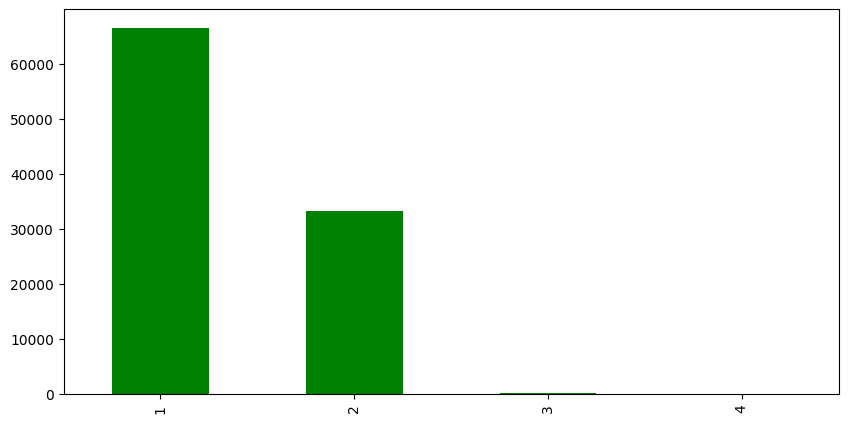

In [18]:
day = df['payment_type'].value_counts()
day.plot(kind='bar',color='green',figsize=(10,5))

**The final rate code in effect at the end of the trip.**
# 1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride

<Axes: >

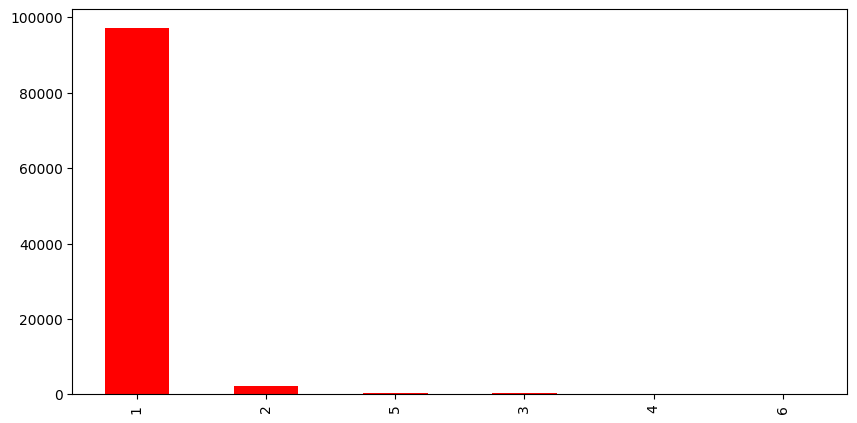

In [29]:
RateCodeID = df['RatecodeID'].value_counts()
RateCodeID.plot(kind='bar',color='red',figsize=(10,5))

This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server. **bold text**
#Y(1) = store and forward trip
#N(0) = not a store and forward trip

<Axes: >

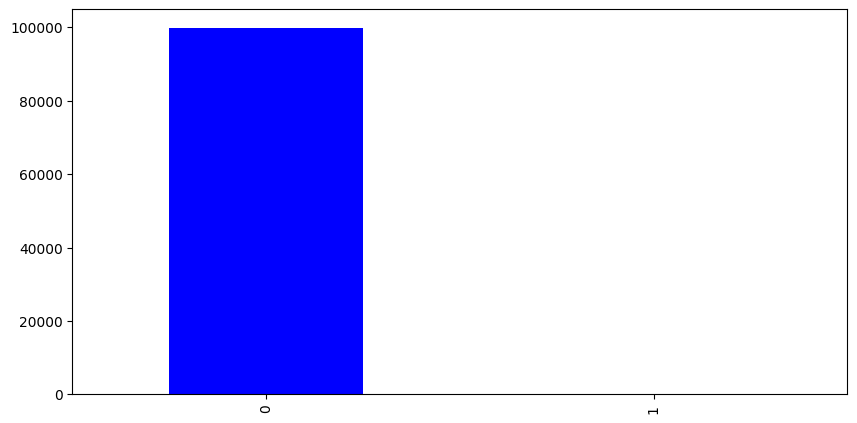

In [30]:
Store_and_fwd_flag = df['store_and_fwd_flag'].value_counts()
Store_and_fwd_flag.plot(kind='bar',color='blue',figsize=(10,5))

<Axes: >

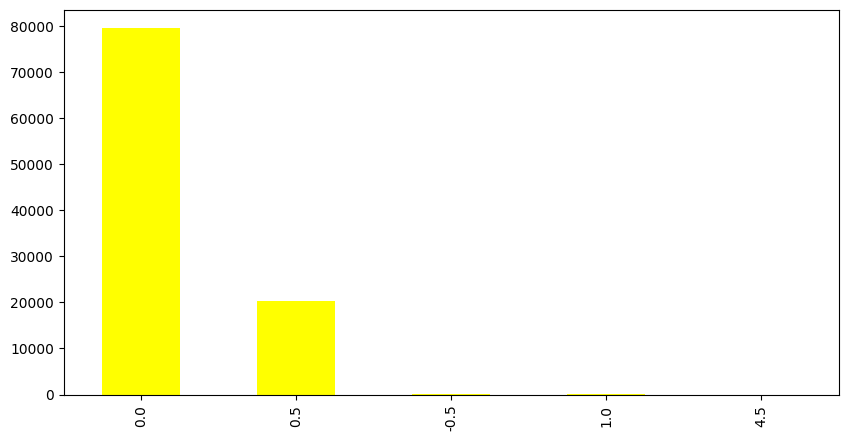

In [31]:
extra = df['extra'].value_counts()
extra.plot(kind='bar',color='yellow',figsize=(10,5))

In [33]:
df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

In [34]:
df.sample(3)

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,datetime_id
46144,2,1,0.95,-73.957901,40.776451,1,0,-73.966652,40.764050,2,...,10,3,2016,3,11,10,3,2016,3,46144
51745,2,6,4.26,-73.975937,40.757317,1,0,-73.987785,40.716358,1,...,10,3,2016,3,12,10,3,2016,3,51745
8159,2,1,1.64,-74.015533,40.714520,1,0,-74.007172,40.705360,2,...,10,3,2016,3,8,10,3,2016,3,8159


In [37]:
x = df.drop(columns=['total_amount'])
y = df['total_amount']

In [44]:
x

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,datetime_id
0,1,1,2.50,-73.976746,40.765152,1,0,-74.004265,40.746128,1,...,1,3,2016,1,0,1,3,2016,1,0
1,1,1,2.90,-73.983482,40.767925,1,0,-74.005943,40.733166,1,...,1,3,2016,1,0,1,3,2016,1,1
2,2,2,19.98,-73.782021,40.644810,1,0,-73.974541,40.675770,1,...,1,3,2016,1,0,1,3,2016,1,2
3,2,3,10.78,-73.863419,40.769814,1,0,-73.969650,40.757767,1,...,1,3,2016,1,0,1,3,2016,1,3
4,2,5,30.43,-73.971741,40.792183,3,0,-74.177170,40.695053,1,...,1,3,2016,1,0,1,3,2016,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,1,0.50,-73.990898,40.750519,1,0,-73.998245,40.750462,2,...,1,3,2016,1,6,1,3,2016,1,99995
99996,1,1,3.40,-74.014488,40.718296,1,0,-73.982361,40.752529,1,...,1,3,2016,1,6,1,3,2016,1,99996
99997,1,1,9.70,-73.963379,40.774097,1,0,-73.865028,40.770512,1,...,1,3,2016,1,6,1,3,2016,1,99997
99998,2,1,0.92,-73.984901,40.763111,1,0,-73.970695,40.759148,1,...,1,3,2016,1,6,1,3,2016,1,99998


In [48]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [49]:
scaled_x

array([[-2.75077771, -0.58460417, -0.1388822 , ...,  0.        ,
        -1.81740429, -1.73203349],
       [-2.75077771, -0.58460417, -0.03490324, ...,  0.        ,
        -1.81740429, -1.73199885],
       [ 0.36353355,  0.04456398,  4.40499829, ...,  0.        ,
        -1.81740429, -1.73196421],
       ...,
       [-2.75077771, -0.58460417,  1.73273905, ...,  0.        ,
        -1.81740429,  1.73196421],
       [ 0.36353355, -0.58460417, -0.54959909, ...,  0.        ,
        -1.81740429,  1.73199885],
       [-2.75077771, -0.58460417, -0.52880329, ...,  0.        ,
        -1.81740429,  1.73203349]])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y ,test_size=0.2, random_state=10) 

In [51]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((80000, 27), (20000, 27), (80000,), (20000,))

In [52]:
model = XGBRegressor()

In [53]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
y_pred = model.predict(x_test)
y_pred

array([ 5.299626 ,  5.7621865, 19.085981 , ..., 10.417798 , 27.519821 ,
        6.2602634], dtype=float32)

In [61]:
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE): ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE): ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared (R2) Score: ', r2_score(y_test, y_pred))

Mean Absolute Error (MAE):  0.07791475499547647
Mean Squared Error (MSE):  0.31532885008085354
Root Mean Squared Error (RMSE):  0.5615414945316628
R-squared (R2) Score:  0.9984790934955524
